# Support Vector Machines

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Part 1: Using 'Sepal Length' and 'Sepal Width'

In [3]:
data= datasets.load_iris()
X = data.data
y = data.target
m, n = X.shape

col = data['feature_names']
names = data['target_names']

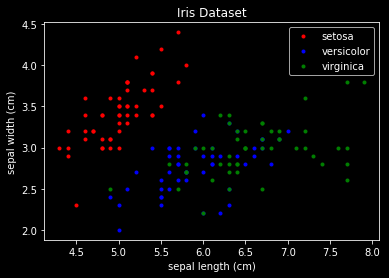

In [4]:
plt.figure()
plt.plot(X[y==0, 0], X[y==0, 1], 'r.', label=names[0])
plt.plot(X[y==1, 0], X[y==1, 1], 'b.', label=names[1])
plt.plot(X[y==2, 0], X[y==2, 1], 'g.', label=names[2])
plt.xlabel(col[0])
plt.ylabel(col[1])
plt.title('Iris Dataset')
plt.legend()
plt.show()

In [5]:
clf = svm.SVC(C = 1, kernel='linear')
clf.fit(X[:, :2], y)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
pre = clf.predict(X[:, :2])
acc = pre[pre==y].size/pre.size*100
print(acc)

82.0


# Plotting Decision Boundary

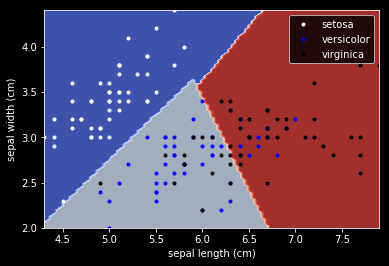

In [7]:
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx, yy = np.meshgrid(xx, yy)

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.plot(X[y==0, 0], X[y==0, 1], 'w.', label=names[0])
ax.plot(X[y==1, 0], X[y==1, 1], 'b.', label=names[1])
ax.plot(X[y==2, 0], X[y==2, 1], 'k.', label=names[2])
ax.set_xlabel(col[0])
ax.set_ylabel(col[1])
ax.legend()
plt.show()


# Using PCA to reduce the features

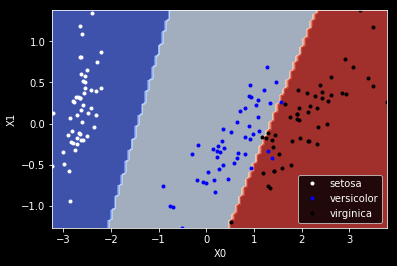

In [8]:
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

model = svm.SVC(kernel='linear')
clf2 = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]

xx = np.linspace(X0.min(), X0.max(), 100)
yy = np.linspace(X1.min(), X1.max(), 100)
xx, yy = np.meshgrid(xx, yy)

z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(Xreduced[y==0, 0], Xreduced[y==0, 1], 'w.', label=names[0])
plt.plot(Xreduced[y==1, 0], Xreduced[y==1, 1], 'b.', label=names[1])
plt.plot(Xreduced[y==2, 0], Xreduced[y==2, 1], 'k.', label=names[2])
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()

In [9]:
pre = clf2.predict(Xreduced)
acc = y[pre==y].size/y.size*100
print(acc)

96.66666666666667


# Part 3: Using All 4 features

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = model.fit(X_train, y_train)

In [14]:
y_pred = clf.predict(X_test)
acc = y_pred[y_pred==y_test].size/y_test.size*100
print(acc)

97.36842105263158


In [30]:
def plotConfusionMatrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues,):
    '''
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    '''
    if not title:
        title = 'Confusion Matrix'
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, 
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[15  0  0]
 [ 0 11  1]
 [ 0  0 11]]


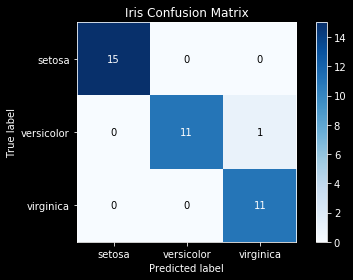

In [31]:
ax = plotConfusionMatrix(y_test, y_pred, names, 'Iris Confusion Matrix')
plt.show()